In [1]:
!rm -rf /content/Split_data

In [3]:
!unzip -q '/content/drive/MyDrive/custom model/Split_data.zip' -d /content/

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os

In [60]:
training_data_path =  '/content/Split_data/Train/Group_1'
validation_data_path = '/content/Split_data/Validation/Group_1'

In [61]:
os.listdir(training_data_path)

['Baked Potato', 'Donut', 'Crispy Chicken']

In [62]:
os.listdir(validation_data_path)

['Baked Potato', 'Donut', 'Crispy Chicken']

In [64]:
os.listdir(training_data_path+'/Baked Potato')

['Baked Potato-Train (1323).jpeg',
 'Baked Potato-Train (1357).jpeg',
 'Baked Potato-Train (547).jpeg',
 'Baked Potato-Train (246).jpeg',
 'Baked Potato-Train (1163).jpeg',
 'Baked Potato-Train (579).jpeg',
 'Baked Potato-Train (14).jpeg',
 'Baked Potato-Train (1422).jpeg',
 'Baked Potato-Train (1378).jpeg',
 'Baked Potato-Train (1109).jpeg',
 'Baked Potato-Train (1084).jpeg',
 'Baked Potato-Train (1382).jpeg',
 'Baked Potato-Train (1457).jpeg',
 'Baked Potato-Train (563).jpeg',
 'Baked Potato-Train (1274).jpeg',
 'Baked Potato-Train (621).jpeg',
 'Baked Potato-Train (370).jpeg',
 'Baked Potato-Train (1186).jpeg',
 'Baked Potato-Train (759).jpeg',
 'Baked Potato-Train (840).jpeg',
 'Baked Potato-Train (872).jpeg',
 'Baked Potato-Train (148).jpeg',
 'Baked Potato-Train (408).jpeg',
 'Baked Potato-Train (1195).jpeg',
 'Baked Potato-Train (254).jpeg',
 'Baked Potato-Train (1065).jpeg',
 'Baked Potato-Train (213).jpeg',
 'Baked Potato-Train (229).jpeg',
 'Baked Potato-Train (278).jpeg',
 '

In [65]:
os.listdir(training_data_path+'/Crispy Chicken')

['Crispy Chicken-Train (669).jpeg',
 'Crispy Chicken-Train (424).jpeg',
 'Crispy Chicken-Train (495).jpeg',
 'Crispy Chicken-Train (503).jpeg',
 'Crispy Chicken-Train (148).jpeg',
 'Crispy Chicken-Train (803).jpeg',
 'Crispy Chicken-Train (744).jpeg',
 'Crispy Chicken-Train (519).jpeg',
 'Crispy Chicken-Train (1197).jpeg',
 'Crispy Chicken-Train (1337).jpeg',
 'Crispy Chicken-Train (250).jpeg',
 'Crispy Chicken-Train (1138).jpeg',
 'Crispy Chicken-Train (1217).jpeg',
 'Crispy Chicken-Train (1388).jpeg',
 'Crispy Chicken-Train (158).jpeg',
 'Crispy Chicken-Train (1128).jpeg',
 'Crispy Chicken-Train (1220).jpeg',
 'Crispy Chicken-Train (847).jpeg',
 'Crispy Chicken-Train (1421).jpeg',
 'Crispy Chicken-Train (653).jpeg',
 'Crispy Chicken-Train (218).jpeg',
 'Crispy Chicken-Train (525).jpeg',
 'Crispy Chicken-Train (294).jpeg',
 'Crispy Chicken-Train (905).jpeg',
 'Crispy Chicken-Train (124).jpeg',
 'Crispy Chicken-Train (272).jpeg',
 'Crispy Chicken-Train (1299).jpeg',
 'Crispy Chicken-Tr

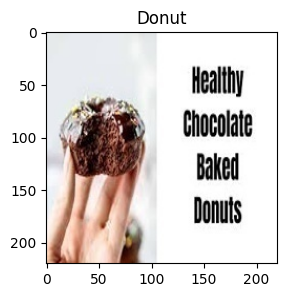

In [66]:
plt.figure(figsize=(5,3))
plt.title('Donut')
Baked_potato = plt.imread(training_data_path + '/Donut/Donut (1051).jpeg')
plt.imshow(Baked_potato)
plt.show()

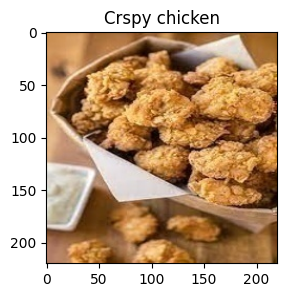

In [67]:
plt.figure(figsize=(5,3))
plt.title('Crspy chicken')
Donut = plt.imread(training_data_path + '/Crispy Chicken/Crispy Chicken-Train (1053).jpeg')
plt.imshow(Donut)
plt.show()

**Image Data Augumentation**

In [68]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [69]:
training_set = ImageDataGenerator(rescale = 1 / 255,
                                  rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

validation_set = ImageDataGenerator(rescale = 1 / 255,rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [72]:
labels =  ['Baked Potato', 'Donut', 'Crispy Chicken']

In [73]:
train_input_data = training_set.flow_from_directory(training_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 30)

val_input_data = validation_set.flow_from_directory(validation_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 30)

Found 360 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [74]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.activations import relu,sigmoid,softmax
from tensorflow.keras.applications import VGG16

In [75]:
import warnings
warnings.filterwarnings('ignore')

# Model architecture

model = Sequential()

# 1st Filter (or) Hidden layer
model.add(Conv2D(64, kernel_size=(3,3), kernel_initializer='he_uniform', padding='valid', strides=1, input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Filter (or) Hidden layer
model.add(Conv2D(32 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Filter (or) Hidden layer
model.add(Conv2D(8 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 4th Filter (or) Hidden layer
model.add(Conv2D(4 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(16,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(2,kernel_initializer='he_uniform',activation='relu'))

model.add(Dense(1,kernel_initializer='he_uniform',activation='sigmoid'))

In [76]:
num_classes = 3
vgg_model = VGG16(input_shape=(256, 256, 3),
                  weights='imagenet',
                  include_top=False)

# Freeze base model layers so only top layers train
for layer in vgg_model.layers:
    layer.trainable = False

# Flatten and add fully connected layers
x = Flatten()(vgg_model.output)
h1_out = Dense(units=128, kernel_initializer='he_uniform', activation='relu')(x)
h2_out = Dense(units=16, kernel_initializer='he_uniform', activation='relu')(h1_out)

# Final output layer for 3 classes
output = Dense(units=num_classes, kernel_initializer='glorot_uniform', activation='softmax')(h2_out)

# Create the final model
model = Model(inputs=vgg_model.input, outputs=output)


In [77]:
vgg_model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [78]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [79]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_input_data,
    epochs=50,
    validation_data=val_input_data
)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 766ms/step - accuracy: 0.3542 - loss: 1.1135 - val_accuracy: 0.5250 - val_loss: 0.9744
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 746ms/step - accuracy: 0.6771 - loss: 0.8567 - val_accuracy: 0.6167 - val_loss: 0.8001
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 776ms/step - accuracy: 0.7404 - loss: 0.7063 - val_accuracy: 0.6750 - val_loss: 0.7179
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 641ms/step - accuracy: 0.7608 - loss: 0.5978 - val_accuracy: 0.6917 - val_loss: 0.6541
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 737ms/step - accuracy: 0.8119 - loss: 0.5158 - val_accuracy: 0.7250 - val_loss: 0.6326
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 739ms/step - accuracy: 0.8449 - loss: 0.4293 - val_accuracy: 0.7750 - val_loss: 0.5564
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 651ms/step - accuracy: 0.9239 - loss: 0.3343 - val_accuracy: 0.8083 - val_loss: 0.5125
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 760ms/step - accuracy: 0.9633 - loss: 0.2712 - val_accuracy: 0

**test_model**

In [80]:
import cv2

In [81]:
labels

['Baked Potato', 'Donut', 'Crispy Chicken']

In [82]:
train_input_data.class_indices

{'Baked Potato': 0, 'Donut': 1, 'Crispy Chicken': 2}

In [83]:
def fun(path):
    global model, train_input_data

    import cv2
    import numpy as np
    import matplotlib.pyplot as plt

    # --- 1. Load and preprocess the image ---
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found: {path}")

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img_rgb, (256, 256))
    normalized = resized / 255.0
    input_image = np.expand_dims(normalized, axis=0)

    # --- 2. Predict using the model ---
    pred = model.predict(input_image, verbose=0)

    # --- 3. Get class mapping dynamically ---
    # Automatically adapts to whatever classes your train_input_data has
    mapping = train_input_data.class_indices
    inv_map = {v: k for k, v in mapping.items()}

    # --- 4. Get predicted class ---
    predicted_index = int(np.argmax(pred))
    predicted_label = inv_map.get(predicted_index, "Unknown Class")

    # --- 5. Debugging info ---
    print("\nGroup class mapping:", mapping)
    print("Model output probabilities:", np.round(pred, 3))
    print(f"Predicted class index: {predicted_index}")
    print(f"Predicted label: {predicted_label}\n")

    # --- 6. Display image with prediction ---
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}")
    plt.show()



Group class mapping: {'Baked Potato': 0, 'Donut': 1, 'Crispy Chicken': 2}
Model output probabilities: [[0.002 0.    0.998]]
Predicted class index: 2
Predicted label: Crispy Chicken



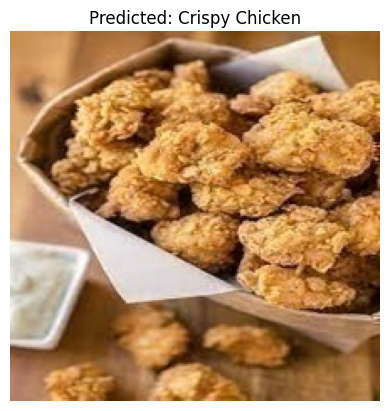

In [84]:
fun('/content/Split_data/Train/Group_1/Crispy Chicken/Crispy Chicken-Train (1053).jpeg')


Group class mapping: {'Baked Potato': 0, 'Donut': 1, 'Crispy Chicken': 2}
Model output probabilities: [[0.037 0.835 0.127]]
Predicted class index: 1
Predicted label: Donut



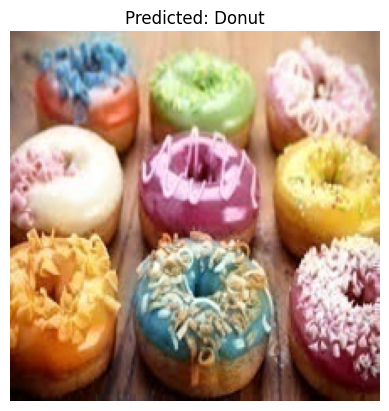

In [85]:
fun('/content/Split_data/Test/Group_1/Donut/Donut (1227).jpeg')

In [86]:
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [87]:
test_data_path = '/content/Split_data/Test/Group_1'

In [88]:
labels = ['Baked Potato', 'Donut', 'Crispy Chicken']

In [90]:
test_set = ImageDataGenerator(rescale=1./255)

test_input_data = test_set.flow_from_directory(
    test_data_path,
    classes=labels,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=10,
    shuffle=False
)


Found 120 images belonging to 3 classes.


In [91]:
test_input_data.reset()
predictions = model.predict(test_input_data, verbose=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step


In [92]:
from sklearn.metrics import classification_report, accuracy_score

In [93]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_input_data.classes

In [94]:
y_pred = y_pred.astype(int)
y_true = y_true.astype(int)

In [95]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(test_input_data.class_indices.keys())))


Classification Report:

                precision    recall  f1-score   support

  Baked Potato       0.86      0.75      0.80        40
         Donut       0.86      0.93      0.89        40
Crispy Chicken       0.79      0.82      0.80        40

      accuracy                           0.83       120
     macro avg       0.83      0.83      0.83       120
  weighted avg       0.83      0.83      0.83       120



In [96]:
accuracy = accuracy_score(y_true, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")


Test Accuracy: 0.8333


In [100]:
from tensorflow.keras.models import load_model
model.save('/content/vgg16_group1.h5')
model = load_model('/content/vgg16_group1.h5')
